<a href="https://colab.research.google.com/github/dhanesh15/NM-Data-Analytics-Using-Cognos/blob/main/customer_churn_prediction_NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Import Kfold
from sklearn.model_selection import KFold, StratifiedKFold
#import SMOTE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
data.dropna(inplace=True)

In [10]:
data.drop('customerID', axis=1, inplace=True)

In [11]:
# Converting Categorical columns to dummy variables
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [12]:
data_dummies = pd.get_dummies(data)

In [13]:
data_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


<Axes: >

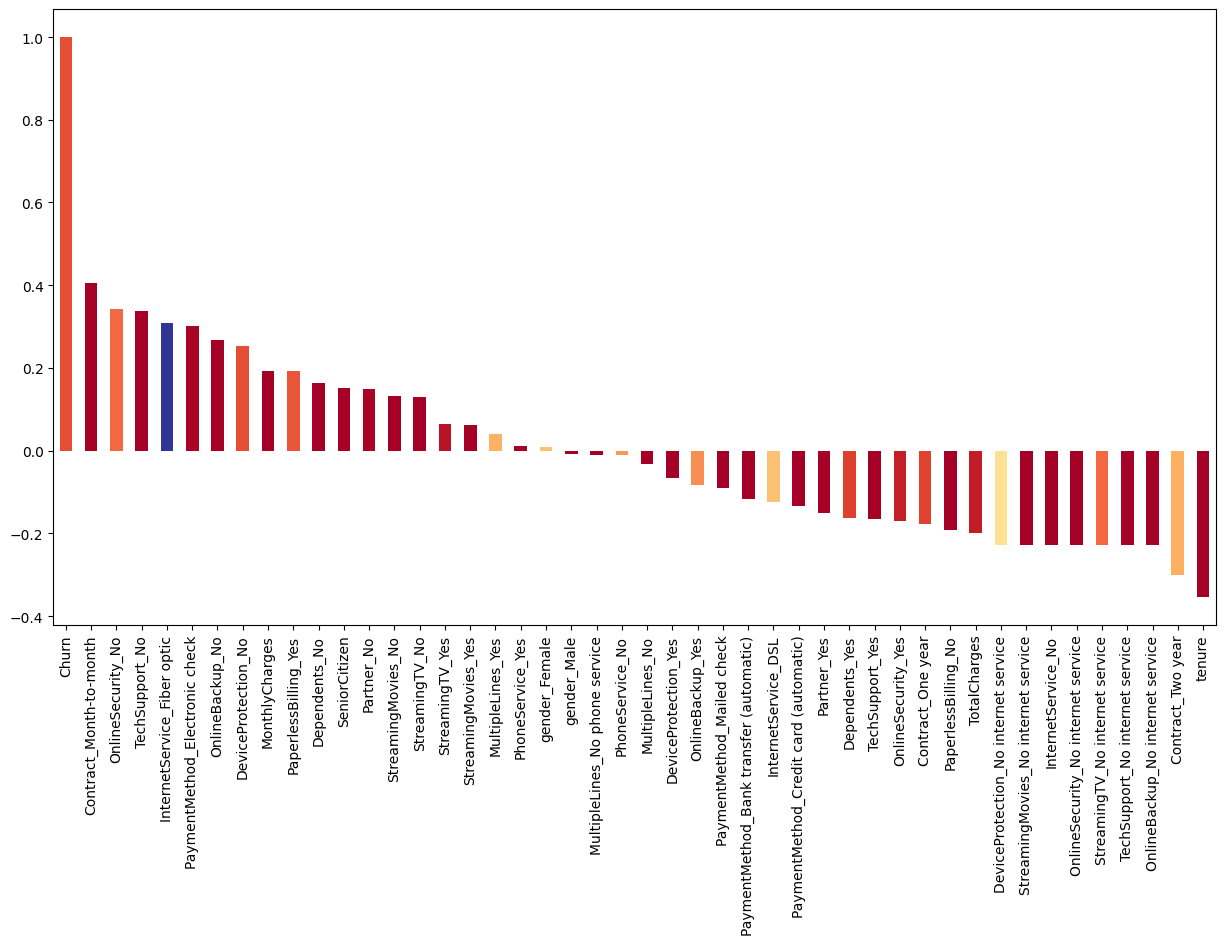

In [14]:
# Plotting Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
cmap = plt.get_cmap('RdYlBu')
colors = cmap(data_dummies.corr()['Churn'].values)
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color=colors)

In [15]:
X = data_dummies.drop('Churn', axis=1)
y = data_dummies['Churn']

In [16]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [17]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
y_train.value_counts()

0    3679
1    1243
Name: Churn, dtype: int64

In [19]:
print("Distribution of target variable in training set before applying SMOTE: ", y_train.value_counts(), sep='\n')

sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("\nDistribution of target variable in training set after applying SMOTE: ", y_train_sm.value_counts(), sep='\n')

Distribution of target variable in training set before applying SMOTE: 
0    3679
1    1243
Name: Churn, dtype: int64

Distribution of target variable in training set after applying SMOTE: 
1    3679
0    3679
Name: Churn, dtype: int64


In [20]:
print("Distribution of target variable in testing set before applying SMOTE: ", y_test.value_counts(), sep='\n')

sm = SMOTE(random_state=123)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)

print("\nDistribution of target variable in testing set after applying SMOTE: ", y_test_sm.value_counts(), sep='\n')

Distribution of target variable in testing set before applying SMOTE: 
0    1484
1     626
Name: Churn, dtype: int64

Distribution of target variable in testing set after applying SMOTE: 
0    1484
1    1484
Name: Churn, dtype: int64


**Model Building**

## 1. Logistic Regression

### Training on Imbalanced Training Data and Testing on Imbalanced Testing Data

In [ ]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train, y_train)
y_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1484
           1       0.74      0.55      0.63       626

    accuracy                           0.81      2110
   macro avg       0.78      0.73      0.75      2110
weighted avg       0.80      0.81      0.80      2110



### Training on Balanced Training Data and Testing on Balanced Testing Data

In [ ]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train_sm, y_train_sm)
y_preds = log_reg.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1484
           1       0.77      0.82      0.79      1484

    accuracy                           0.79      2968
   macro avg       0.79      0.79      0.79      2968
weighted avg       0.79      0.79      0.79      2968



### Training on Balanced Training Data and Testing on Imbalanced Testing Data

In [ ]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train_sm, y_train_sm)
y_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1484
           1       0.57      0.79      0.66       626

    accuracy                           0.76      2110
   macro avg       0.73      0.77      0.74      2110
weighted avg       0.80      0.76      0.77      2110



<Axes: >

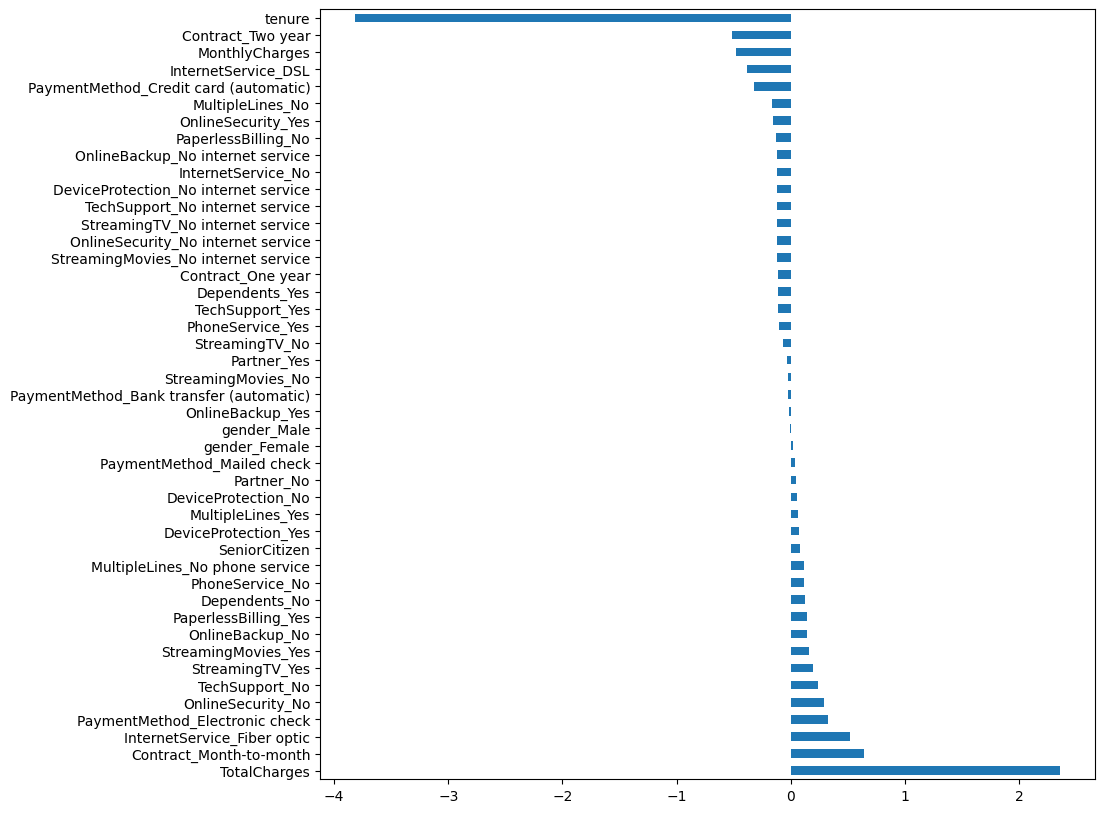

In [ ]:
feature_importance = pd.Series(log_reg.coef_[0], index=features).sort_values(ascending=False)
feature_importance.plot(kind='barh', figsize=(10,10))

<Axes: >

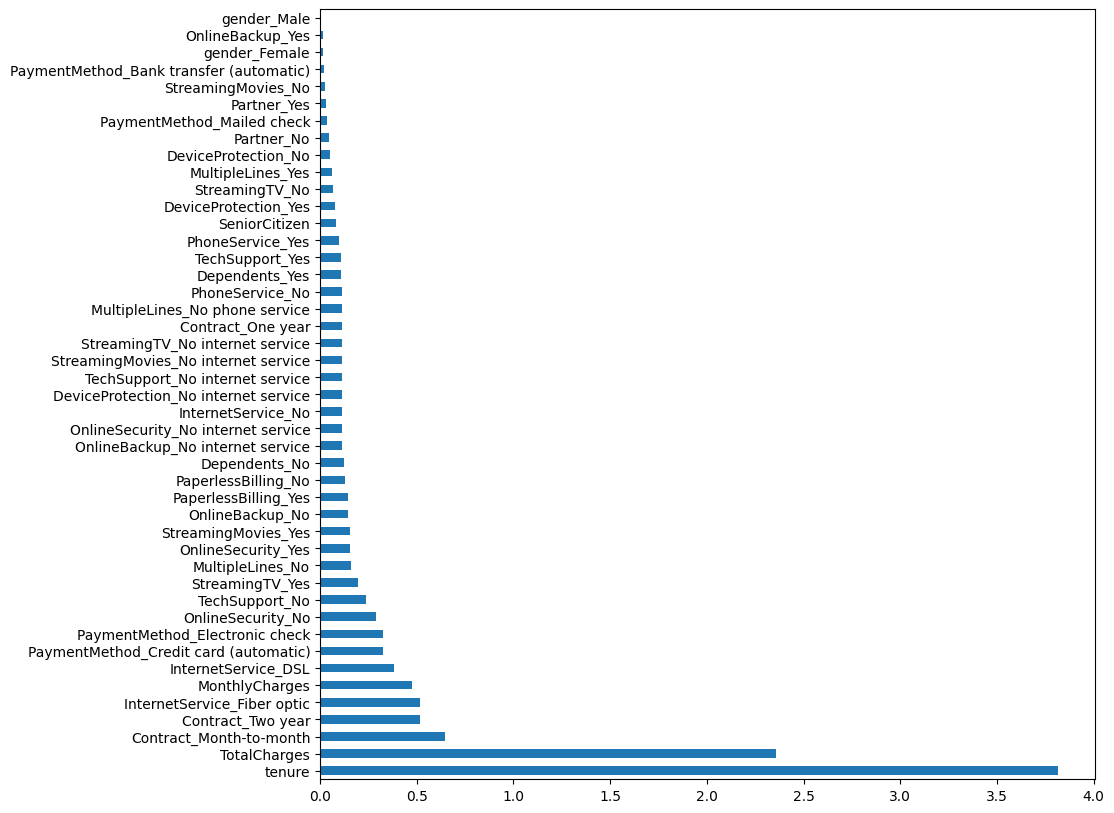

In [ ]:
feature_importance = pd.Series(abs(log_reg.coef_[0]), index=features).sort_values(ascending=False)
feature_importance.plot(kind='barh', figsize=(10,10))

It is clear that the tenure feature has the highest significance in predicting the churn rate. The longer the tenure, the less likely the customer is to churn, as shown by the negative coefficient. The second most significant feature is the TotalCharges feature with a positive coefficient followed by a positive coefficient of Month-to-month contract and so on.

In [ ]:
# Do gridsearch across 10 folds for Logistic Regression
log_reg = LogisticRegression()
param_grid = {
            'C': np.logspace(-4, 4, 50),
            'penalty': ['l2', 'none'],
            'solver': ['lbfgs', 'sag', 'saga']
            }
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=10, scoring = 'recall', n_jobs=-1, verbose=1)
log_reg_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(log_reg_cv.best_params_))
print("Best score is {}\n\n".format(log_reg_cv.best_score_))

y_preds = log_reg_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Tuned Logistic Regression Parameters: {'C': 0.0001, 'penalty': 'none', 'solver': 'lbfgs'}
Best score is 0.5157290322580644


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1484
           1       0.74      0.54      0.62       626

    accuracy                           0.81      2110
   macro avg       0.78      0.73      0.75      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
# Doing gridsearch across 10 folds for Logistic Regression with SMOTE
log_reg = LogisticRegression()
param_grid = {
            'C': np.logspace(-4, 4, 50),
            'penalty': ['l2', 'none'],
            'solver': ['lbfgs', 'sag', 'saga']
            }
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=10, scoring = 'recall', n_jobs=-1, verbose=1)
log_reg_cv.fit(X_train_sm, y_train_sm)
print("Tuned Logistic Regression Parameters: {}".format(log_reg_cv.best_params_))
print("Best score is {}\n\n".format(log_reg_cv.best_score_))

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Tuned Logistic Regression Parameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score is 0.8284904039805709




In [ ]:
y_preds = log_reg_cv.best_estimator_.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1484
           1       0.73      0.84      0.78      1484

    accuracy                           0.77      2968
   macro avg       0.77      0.77      0.76      2968
weighted avg       0.77      0.77      0.76      2968



In [ ]:
y_preds = log_reg_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1484
           1       0.53      0.82      0.64       626

    accuracy                           0.73      2110
   macro avg       0.72      0.76      0.71      2110
weighted avg       0.79      0.73      0.74      2110



## 2. Random Forest

In [ ]:
rf = RandomForestClassifier()
result = rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85      1484
           1       0.66      0.44      0.53       626

    accuracy                           0.77      2110
   macro avg       0.73      0.67      0.69      2110
weighted avg       0.76      0.77      0.75      2110



In [ ]:
rf = RandomForestClassifier()
result = rf.fit(X_train_sm, y_train_sm)
y_preds = rf.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1484
           1       0.84      0.70      0.77      1484

    accuracy                           0.78      2968
   macro avg       0.79      0.78      0.78      2968
weighted avg       0.79      0.78      0.78      2968



In [ ]:
y_preds = rf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1484
           1       0.63      0.55      0.58       626

    accuracy                           0.77      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.76      0.77      0.76      2110



In [ ]:
# Tuning Hyperparameters of RF
rf = RandomForestClassifier()
param_grid = {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'criterion' :['gini', 'entropy']
            }
rf_cv = GridSearchCV(rf, param_grid, cv=10, scoring = 'recall', n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}\n\n".format(rf_cv.best_score_))

y_preds = rf_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 500}
Best score is 0.4779548387096774


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1484
           1       0.72      0.49      0.58       626

    accuracy                           0.79      2110
   macro avg       0.77      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [ ]:
# Tuning Hyperparameters of RF
rf = RandomForestClassifier()
param_grid = {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'criterion' :['gini', 'entropy']
            }
rf_cv = GridSearchCV(rf, param_grid, cv=10, scoring = 'recall', n_jobs=-1, verbose=1)
rf_cv.fit(X_train_sm, y_train_sm)
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}\n\n".format(rf_cv.best_score_))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 300}
Best score is 0.8774315839355525




In [ ]:
y_preds = rf_cv.best_estimator_.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1484
           1       0.82      0.82      0.82      1484

    accuracy                           0.82      2968
   macro avg       0.82      0.82      0.82      2968
weighted avg       0.82      0.82      0.82      2968



In [ ]:
y_preds = rf_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1484
           1       0.63      0.70      0.66       626

    accuracy                           0.79      2110
   macro avg       0.75      0.76      0.75      2110
weighted avg       0.80      0.79      0.79      2110



## 3. XGBoost

In [ ]:
xgb = XGBClassifier()
result = xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1484
           1       0.67      0.51      0.58       626

    accuracy                           0.78      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



In [ ]:
# Tuning Hyperparameters of XGB
xgb = XGBClassifier()

param_grid = {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
            }
xgb_cv = GridSearchCV(xgb, param_grid, cv=10, scoring = 'recall', n_jobs=-1, verbose=1)
xgb_cv.fit(X_train, y_train)
print("Tuned XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}\n\n".format(xgb_cv.best_score_))

y_preds = xgb_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Tuned XGB Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best score is 0.5012709677419355


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1484
           1       0.70      0.50      0.59       626

    accuracy                           0.79      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [ ]:
# Tuning Hyperparameters of XGB with SMOTE
xgb = XGBClassifier()

param_grid = {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
            }
xgb_cv = GridSearchCV(xgb, param_grid, cv=10, scoring = 'recall', n_jobs=-1, verbose=1)
xgb_cv.fit(X_train_sm, y_train_sm)
print("Tuned XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}\n\n".format(xgb_cv.best_score_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Tuned XGB Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best score is 0.8635780713185642




In [ ]:
y_preds = xgb_cv.best_estimator_.predict(X_test_sm)
print(classification_report(y_test_sm, y_preds))

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):



    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


In [ ]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 14
labels = ['No Churn', 'Churn']
cm = [[1244, 240], [199, 427]]


## Refining the model

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Implementing StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=123)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print("Distribution of target variable in training set: ", y_train.value_counts())


In [ ]:
# Applying SMOTE only on training data
sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Distribution of target variable in training set after SMOTE: ", y_train_sm.value_counts())

In [ ]:
# Expanding the hyperparameters for XGB
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
xgb_cv = GridSearchCV(xgb, param_grid, cv=skf, scoring='recall', n_jobs=-1, verbose=1)
xgb_cv.fit(X_train_sm, y_train_sm)

print("Tuned XGB Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}\n".format(xgb_cv.best_score_))

y_preds = xgb_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Implementing StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=123)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Applying SMOTE only on training data
sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Feature Selection using Recursive Feature Elimination
rfe = RFE(estimator=XGBClassifier(), n_features_to_select=15)
X_train_sm_rfe = rfe.fit_transform(X_train_sm, y_train_sm)
X_test_rfe = rfe.transform(X_test)

# Model Ensembling
xgb = XGBClassifier()
rf = RandomForestClassifier()

voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb), ('rf', rf)
], voting='soft')

param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [4, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__gamma': [0, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__reg_lambda': [0.5, 1],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10]
}

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(voting_classifier, param_grid, cv=skf, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(X_train_sm_rfe, y_train_sm)

y_probs = grid_search.best_estimator_.predict_proba(X_test_rfe)[:,1]

# Post-processing: Adjusting classification threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
threshold = thresholds[np.argmax(2*(precision*recall)/(precision+recall))]  # F1 optimized threshold
y_preds = [1 if prob > threshold else 0 for prob in y_probs]

print(classification_report(y_test, y_preds))

# AUC of the precision-recall curve
auc_score = auc(recall, precision)
print(f"AUC of Precision-Recall Curve: {auc_score:.2f}")

In [ ]:
grid_search.best_estimator_

In [ ]:
# Extract the trained estimators from the VotingClassifier
trained_xgb = grid_search.best_estimator_.named_estimators_['xgb']
trained_rf = grid_search.best_estimator_.named_estimators_['rf']

# Obtain feature importances from each model
xgb_importances = trained_xgb.feature_importances_
rf_importances = trained_rf.feature_importances_

# Extract feature names from the RFE
selected_features = [X.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
